In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [50]:
#Read data
df = pd.read_csv('fit_data_exports.csv')
df = df.replace(-np.inf, np.nan).dropna()

#Define quantile categories
df['log_RCA_cat'] = (1*df['log_RCA'].rank(pct = True)).round(2)
df["log_xcp_cat"] = (1.5*df["log_xcp"].rank(pct = True)).round(2)
df['T_cat'] = (1*df.groupby("log_RCA_cat")["T"].rank(pct = True)).round(2)


df = df[['ccode','pcode','log_RCA','log_xcp','T','RCA_bin_end','log_RCA_cat','log_xcp_cat','T_cat','ex_growth','RCA_bin_start','year','RCA_fin']]

In [17]:
#China is best in prod 5002 in 2003
#Andorra in 7001 in 2003
#Kenya in 5304
#Rwa in 2609 in 2005

# df.loc[df.ccode == 'usa'].sort_values(by = 'log_RCA').tail(5) 


In [53]:
#Compute mean and std of growth for exporting
dg = df.groupby(['log_RCA_cat','T_cat']).mean().reset_index()[['log_RCA_cat','T_cat','log_RCA','log_xcp','T','RCA_bin_end','ex_growth']]
dg = dg.join(df.groupby(['log_RCA_cat','T_cat']).std().reset_index()[['log_RCA_cat','T_cat','ex_growth']], rsuffix='_std')

# plt.figure(figsize=(10,5))

# plt.scatter(dg.X, dg.log_RCA, c = dg.ex_growth_std, cmap = 'Set1', edgecolors='None', s=40)
# plt.colorbar()
# plt.show()

dg[['T', 'log_RCA','ex_growth']].to_csv('meanGrowth.csv', index = False)
dg[['T', 'log_RCA','ex_growth_std']].to_csv('stdGrowth.csv', index = False)

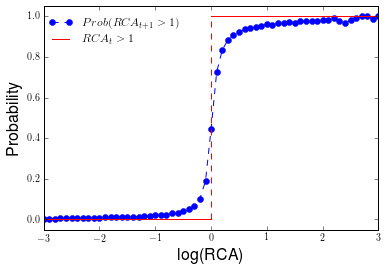

In [54]:
df['log_RCA_r'] = df.log_RCA.round(1)
# success_RCA_1 = df.loc[df.ccode == 'chn'].groupby('log_RCA_r').mean()['RCA_bin_end'].reset_index()
# success_RCA_2 = df.loc[df.ccode == 'bgr'].groupby('log_RCA_r').mean()['RCA_bin_end'].reset_index()
success_RCA = df.groupby('log_RCA_r').mean()['RCA_bin_end'].reset_index()


plt.plot(success_RCA.log_RCA_r, success_RCA.RCA_bin_end, 'o--', c = 'b', mec = 'b', label = '$Prob(RCA_{t+1} > 1)$')
# plt.scatter(success_RCA_1.log_RCA_r, success_RCA_1.RCA_bin_end, c = success_RCA_1.RCA_bin_end , s=40, cmap = 'Set1', edgecolor = 'None', label = '$Prob(RCA_{t+1} > 1)$')
# plt.plot(success_RCA_2.log_RCA_r, success_RCA_2.RCA_bin_end, 'o--', c = 'g', mec = 'g')
plt.plot([-3,0], [0,0], '-', c = 'r', mec = 'r', label = '$RCA_{t} > 1$')
plt.plot([0,3], [1,1], '-', c = 'r', mec = 'r')
plt.plot([0,0], [0,1], '--', c = 'r', mec = 'r')
plt.xlabel('log(RCA)', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.xlim(-3,3)
plt.ylim(-0.05,1.05)
plt.legend(loc = (0,.8), frameon = False)
# leg.get_frame().set_linewidth(0.0)
plt.show()

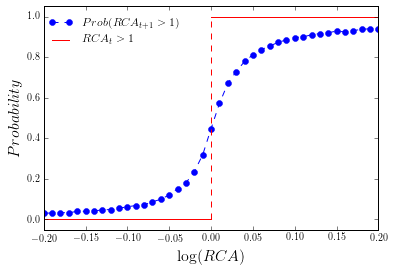

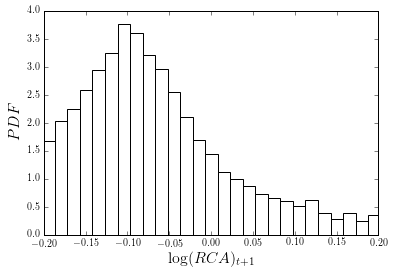

In [55]:
#Zoom in and make example histogram...

df['log_RCA_r'] = (.3*df.log_RCA).round(2)
success_RCA = df.groupby('log_RCA_r').mean()['RCA_bin_end'].reset_index()


plt.plot(success_RCA.log_RCA_r, success_RCA.RCA_bin_end, 'o--', c = 'b', mec = 'b', label = '$Prob(RCA_{t+1} > 1)$')
plt.plot([-3,0], [0,0], '-', c = 'r', mec = 'r', label = '$RCA_{t} > 1$')
plt.plot([0,3], [1,1], '-', c = 'r', mec = 'r')
plt.plot([0,0], [0,1], '--', c = 'r', mec = 'r')
plt.xlabel('$\log(RCA)$', fontsize = 16)
plt.ylabel('$Probability$', fontsize = 16)
plt.xlim(-.2,.2)
plt.ylim(-0.05,1.05)
plt.legend(loc = (0,.8), frameon = False)
# leg.get_frame().set_linewidth(0.0)
plt.show()

plt.hist(np.log10(df.loc[df.log_RCA_r == -0.03].RCA_fin), 400, normed = 'PDF', color='white')
# plt.hist(df.loc[df.log_RCA_r == -0.03].'log_RCA', 10, normed = 'PDF')

plt.xlabel('$\log(RCA)_{t+1}$', fontsize = 16)
plt.ylabel('$PDF$', fontsize = 16)
plt.xlim(-.2,.2)
plt.ylim(0,4)
plt.show()

#Empty plot frames for drawing

# plt.plot()
# plt.xlabel('$\log(RCA)$', fontsize = 16)
# plt.ylabel('$Probability$', fontsize = 16)
# plt.xlim(-.2,.2)
# plt.ylim(-0.05,1.05)
# plt.show()

# plt.plot()
# plt.xlabel('$\log(RCA)_{t+1}$', fontsize = 16)
# plt.ylabel('$PDF$', fontsize = 16)
# plt.xlim(-.2,.2)
# plt.ylim(0,4)
# plt.show()

In [51]:
dg = df.groupby(['log_RCA_cat','T_cat']).mean().reset_index()[['log_RCA_cat','T_cat','log_RCA','log_xcp','T','RCA_bin_end','ex_growth']]

# dg[['T','log_RCA','RCA_bin_end']].to_csv('numericalRCA_LowRes.csv', index = False)
dg[['T','log_RCA','RCA_bin_end']].to_csv('numericalRCA_HiRes.csv', index = False)

In [36]:
success_by_RCA_factors = df.groupby(['log_RCA_cat','X_cat']).mean().reset_index()[['log_RCA_cat','X_cat','log_RCA', 'X','log_xcp','RCA_bin_end']]

In [37]:
success_by_RCA_factors

,log_RCA_cat,X_cat,log_RCA,X,log_xcp,RCA_bin_end
0,0.0,0.00,-3.485271,6.505809,3.020538,0.000000
1,0.0,0.01,-3.524453,6.586892,3.062439,0.000000
2,0.0,0.02,-3.565854,6.653834,3.087980,0.000000
3,0.0,0.03,-3.594313,6.712789,3.118477,0.000000
4,0.0,0.04,-3.613603,6.764596,3.150993,0.000000
5,0.0,0.05,-3.646285,6.808305,3.162020,0.000000
6,0.0,0.06,-3.661589,6.850623,3.189035,0.000000
7,0.0,0.07,-3.686213,6.888999,3.202786,0.006849
8,0.0,0.08,-3.671554,6.920075,3.248520,0.000000
9,0.0,0.09,-3.693662,6.958353,3.264691,0.006849


In [27]:
pr = pd.read_csv('pr.csv')
co = pd.read_csv('co.csv')

data = df[['ccode','pcode','X_cat','log_RCA_cat','RCA_bin_start','year']].merge(success_by_RCA_factors[['X_cat','log_RCA_cat','RCA_bin_end']], how = 'left')
data = data.merge(pr).merge(co, on = 'ccode')

#Subsample for reduced Mcp Matrix
# pcs = list(np.random.choice(df.pcode.unique(),20))
# ccs = list(np.random.choice(df.ccode.unique(),20))

# data = data.loc[data.pcode.isin(pcs) &
#       data.ccode.isin(ccs)]

ccode_i = data.groupby('ccode').mean().reset_index()
ccode_i['cid'] = ccode_i.RCA_bin_end.rank(ascending = False)
ccode_i = ccode_i[['cid','ccode']]

pcode_i = data.groupby('pcode').mean().reset_index()
pcode_i['pid'] = pcode_i.RCA_bin_end.rank(ascending = False)
pcode_i = pcode_i[['pid','pcode']]

dg = data.loc[data.year == 2013].merge(ccode_i).merge(pcode_i)[['cid','pid','RCA_bin_end','name_y','name_x']]
dg.to_csv('SpArray.csv')

In [35]:
# dg['cat'] = dg['RCA_bin_end'].round(1)
# dg.groupby('cat').count()

In [26]:
# dg.loc[dg.name_y == 'India']#.sort_values(by = 'name_y')
# dg

## Older drafts

In [ ]:
df = pd.read_csv('fit_data_sciencepap.csv')
df['w_scaled'] = df.groupby("ccode")['w'].rank(pct = True)

# df = df.loc[df['year'] == 2003]

df['Transition'] = (df['RCA'] < 0.5) & (df['RCA_fin'] > 1)
df['Undeveloped'] = (df['RCA'] < 0.5) & (df['RCA_fin'] < 0.5)

In [ ]:
plt.hist(df.loc[df['Transition']].w, bins  =30, alpha = 0.5, normed = True)
plt.hist(df.loc[df['Undeveloped']].w, bins = 30, alpha = 0.5, normed = True)
plt.show()

In [ ]:
dt = df.loc[df['Transition']]
du = df.loc[df['Undeveloped']].sample(26000)
d = du.append(dt)
plt.scatter(np.log10(d['RCA']),d['w_scaled'], c = d['RCA_bin_end'], edgecolors = 'None', alpha = 0.02)#.sort_values(by = 'RCAf_prod_res')
plt.show()

### Sabado 26/08

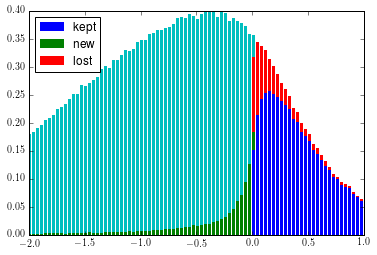

In [137]:
df = pd.read_csv('fit_data_exports.csv')
# df = df.loc[np.abs(df['Xp'] - 4.75) < 0.3]
# df = df.loc[df.ccode == 'irn']
# df['w_scaled'] = df['w'].rank(pct = True)
df = df.loc[(df['export_i'] > 0) & (df['export_f'] > 0)]


df['w_scaled'] = df.groupby("ccode")['w'].rank(pct = True)
df['log_RCA'] = np.log10(df['RCA']).replace(-np.inf, -4)

c11 = df.loc[(df.RCA_bin_start == 1) & (df.RCA_bin_end == 1)].log_RCA
c01 = df.loc[(df.RCA_bin_start == 0) & (df.RCA_bin_end == 1)].log_RCA
c10 = df.loc[(df.RCA_bin_start == 1) & (df.RCA_bin_end == 0)].log_RCA
c00 = df.loc[(df.RCA_bin_start == 0) & (df.RCA_bin_end == 0)].log_RCA


plt.figure()
plt.hist([c11,c01,c10,c00], stacked=True, label = ('kept', 'new','lost'), bins = 300, edgecolor = 'none', normed = True)
plt.legend(loc = 2)
# plt.xlabel(str(var))
plt.xlim(-2,1)
plt.ylim(0,.4)
plt.show()

In [ ]:
def make_plot(x = 'w_scaled', y = 'RCA_bin_end', data = df, step = 0.1, c = 'b', plot = True, summary = False):
    factor = pd.qcut(data[x], np.arange(0,1,step), duplicates='drop')
    s = data.groupby(factor).mean()[[x, y, 'w_scaled','RCA_bin_end','log_inv_trade','log_RCA']]
    s = s.loc[:,~s.columns.duplicated()]
    if summary:
        return s
    if plot:
        plt.scatter(s[x], s[y], c = c)
        plt.xlim(0,1)
        plt.ylim(0,1)


In [ ]:
make_plot('log_RCA', 'RCA_bin_end', data = df, step = 0.01, c = 'b')
plt.xlim(-3,3)
plt.show()

# make_plot('w_scaled', 'RCA_bin_end', data = df.loc[df['RCA_bin_start'] == 0], step = 0.01, c = 'g')
# make_plot('w_scaled', 'RCA_bin_end', data = df.loc[df['RCA_bin_start'] == 1], step = 0.01, c = 'r')
# plt.ylim(0,0.1)
# plt.show()
# 


In [ ]:
s = make_plot('log_RCA', 'RCA_bin_end', data = df, step = 0.01, summary = True)
# s.drop('log_RCA', 1).reset_index()
# df.merge(s, on = 'log_RCA')
# s.index.categories

In [15]:
plt.figure(figsize=(15,5))
for level in [ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]:
    d = success_by_RCA_factors.loc[success_by_RCA_factors.Xc_pct == level]
    plt.plot(d['log_RCA_pct'], d['RCAf_bin_end'], '--o')
plt.show()

plt.figure(figsize=(7,8))
for level in [ 0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41]:
    d = success_by_RCA_factors.loc[success_by_RCA_factors.log_RCA_pct == level]
    plt.plot(d['Xc_pct'], d['RCAf_bin_end'], '--o', label = 'RCA~ '+str(round(df.loc[df.log_RCA_pct == level].RCA.mean(),2)))
plt.legend()

plt.show()

AttributeError: 'DataFrame' object has no attribute 'Xc_pct'

In [151]:
x = df.groupby('ccode').mean()[['Xc','Xp','Xw']].reset_index()
x['t'] = x.Xc + x.Xp - x.Xw
x.sample(20).sort_values(by = 't')

,ccode,Xc,Xp,Xw,t
136,tgo,9.016877,9.758867,13.117320,5.658424
13,bfa,9.006346,9.862986,13.111997,5.757334
116,prk,9.223725,9.679771,13.093320,5.810177
130,sur,9.041852,9.978549,13.124196,5.896205
72,jam,9.227744,9.782608,13.105284,5.905068
18,bih,9.582716,9.562867,13.098292,6.047290
0,abw,9.403287,9.895094,13.115496,6.182885
135,syr,9.794915,9.533489,13.085721,6.242683
31,cmr,9.616770,9.748106,13.111765,6.253111
139,tun,10.174650,9.508851,13.095461,6.588040


In [ ]:
x, y = np.random.randn(2, 10)

xedges=[0,1,2,3]
yedges=[0,1,2,3,4]

H, yedges, xedges = np.histogram2d(y,x, bins=(yedges,xedges))
# extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
# plt.imshow(H, extent=extent, interpolation='None', aspect='auto', cmap = 'winter')
# plt.colorbar()
# plt.show()

np.histogram2d(y,x, bins=(yedges,xedges))

In [ ]:
# A = np.array([[0] for i in range(3)])
A = np.array([list(dg.loc[dg.log_RCA_pct == 0].RCAf_bin_end.values) for i in range(3)])
A.shape

In [ ]:
# x = x.loc[x['log_RCA_pct'] == 0.77].groupby('ccode').filter(lambda y: len(y) > 20).groupby('ccode').mean()
# plt.scatter(range(len(x)), x.sort_values(by = 'RCA_bin_end').log_inv_trade)
# plt.show()
# x.sort_values(by = 'RCA_bin_end')


# dg = x.groupby(['pcode','log_RCA_pct']).mean()
# dg['log_RCA_residual'] = dg['RCA_bin_end'] - dg['g_RCA_bin_end']
# dg = dg.reset_index().groupby('pcode').mean()#.sort_values(by = 'log_RCA_residual')

# prod_residual = dg['log_RCA_residual'].reset_index()
# prod_residual.columns = ['pcode','prod_residual']

In [27]:
x = df.merge(success_by_RCA_factors, on = ['log_RCA_pct', 'Xc_pct'], how = 'inner')

x['RCA_factors_res'] = x['RCA_bin_end'] - x['RCAf_bin_end']

# prod_residual = x.reset_index().groupby('pcode').mean()['RCA_factors_res'].reset_index()
# prod_residual.columns = ['pcode','prod_residual']
# x = x.merge(prod_residual, on = 'pcode')
# x['RCAf_prod_bin_end'] = x['RCAf_bin_end'] #- x['prod_residual']
# x = x[[u'ccode', u'pcode', u'w', u'RCA', u'RCA_bin_start', u'RCA_bin_end',
#        u'year', u'w_scaled', 'w_scaled_pct', u'log_inv_pct', u'RCAf_prod_bin_end']]
# x['RCAf_prod_res'] = x['RCA_bin_end'] - x['RCAf_prod_bin_end']

In [30]:
def axhlines(ys, **plot_kwargs):
    """
    Draw horizontal lines across plot
    :param ys: A scalar, list, or 1D array of vertical offsets
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    ys = np.array((ys, ) if np.isscalar(ys) else ys, copy=False)
    lims = plt.gca().get_xlim()
    y_points = np.repeat(ys[:, None], repeats=3, axis=1).flatten()
    x_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(ys), axis=0).flatten()
    plot = plt.plot(x_points, y_points, scalex = False, **plot_kwargs)
    return plot


def axvlines(xs, **plot_kwargs):
    """
    Draw vertical lines on plot
    :param xs: A scalar, list, or 1D array of horizontal offsets
    :param plot_kwargs: Keyword arguments to be passed to plot
    :return: The plot object corresponding to the lines.
    """
    xs = np.array((xs, ) if np.isscalar(xs) else xs, copy=False)
    lims = plt.gca().get_ylim()
    x_points = np.repeat(xs[:, None], repeats=3, axis=1).flatten()
    y_points = np.repeat(np.array(lims + (np.nan, ))[None, :], repeats=len(xs), axis=0).flatten()
    plot = plt.plot(x_points, y_points, scaley = False, **plot_kwargs)
    return plot

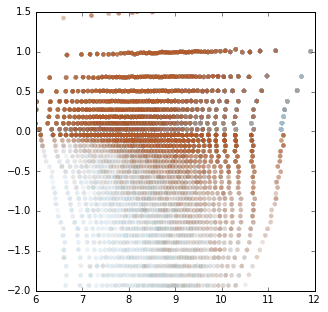

In [42]:
# x[['RCA_bin_start', 'RCA_bin_end', 'log_inv_trade', 'log_RCA','RCA_factors_res']]

# y_lines = list(x.groupby('log_RCA_pct').min().log_RCA_x)[1:]
# x_lines = list(x.groupby('Xc_pct').min().Xc_x)[1:]

sam_00 = x.loc[(x.RCA_bin_start == 0) & (x.RCA_bin_end == 0)].sample(20000)
sam_01 = x.loc[(x.RCA_bin_start == 0) & (x.RCA_bin_end == 1)].sample(20000)
sam_10 = x.loc[(x.RCA_bin_start == 1) & (x.RCA_bin_end == 0)].sample(20000)
sam_11 = x.loc[(x.RCA_bin_start == 1) & (x.RCA_bin_end == 1)].sample(20000)

plt.figure(figsize=[5,5])
z = sam_00.append(sam_01)
plt.scatter(z.Xc_y, z.log_RCA_y, c = z.RCA_bin_end, edgecolors = 'None', alpha = 0.03, cmap = 'Paired')

z = sam_10.append(sam_11)
plt.scatter(z.Xc_y, z.log_RCA_y, c = z.RCA_bin_end, edgecolors = 'None', alpha = 0.03, cmap = 'Paired')
plt.ylim(-2, 1.5)

# axhlines(y_lines, c = 'gray', alpha = 0.3)
# axvlines(x_lines, c = 'gray', alpha = 0.3)
plt.xlim(6, 12)

plt.show()

In [43]:
# y_lines = list(x.groupby('log_RCA_pct').min().log_RCA)[1:]
x_lines = list(x.groupby('Xc_pct').min().Xc)[1:]

sam_00 = x.loc[(x.RCA_bin_start == 0) & (x.RCA_bin_end == 0)].sample(20000)
sam_01 = x.loc[(x.RCA_bin_start == 0) & (x.RCA_bin_end == 1)].sample(20000)
sam_10 = x.loc[(x.RCA_bin_start == 1) & (x.RCA_bin_end == 0)].sample(20000)
sam_11 = x.loc[(x.RCA_bin_start == 1) & (x.RCA_bin_end == 1)].sample(20000)

plt.figure(figsize=[12,8])
z = sam_00.append(sam_01).append(sam_10).append(sam_11)
z = z.loc[z.log_RCA_pct == 0.7]
plt.scatter(z.Xc, z.Xp, c = z.RCA_bin_end, cmap = 'winter', edgecolors = 'None', alpha = .5)
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Xc'

In [ ]:
plt.scatter(x.w_scaled_pct.unique(),x.groupby('w_scaled_pct').mean().RCAf_prod_res)#.sort_values(by = 'RCAf_prod_res')

In [ ]:
d = df.sample(100000)
plt.scatter(d['log_RCA'],d['w_scaled'], c = d['RCA_bin_end'], edgecolors = 'None', alpha = 0.01)#.sort_values(by = 'RCAf_prod_res')

In [ ]:
#Is the residual explained by how successful the countries are on average? -> Not too much

# agg_success = pd.DataFrame(df.loc[(df['RCA_bin_start'] == 0) & (df['RCA_bin_end'] == 1)].groupby('ccode').count().pcode).reset_index()
# agg_success.columns = ['ccode','success']
# RCAf_prod_res = pd.DataFrame(x.groupby('ccode').mean()['RCAf_prod_res']).reset_index()
# dg = RCAf_prod_res.merge(agg_success)

# plt.scatter(dg.RCAf_prod_res, dg.success)
# plt.show()

In [ ]:
def get_shuffled_df(n = 2):
    print 'running rand_residuals'
    shuffled_df = pd.DataFrame()

    c = 0

    for trade_pct in np.sort(x['log_inv_pct'].unique()):
        print 'processing trade_pct '+str(trade_pct)+' ...'
        for log_RCA_pct in np.sort(x['log_RCA_pct'].unique()):
            try:
                group_df = x.groupby(['log_RCA_pct', 'log_inv_pct']).get_group((log_RCA_pct, trade_pct))
                ccode_vals = group_df['ccode'].values
                for i in range(n):
                    np.random.shuffle(ccode_vals);
                    group_df['ccode_'+str(i)] = ccode_vals
                
                if c == 0:
                    shuffled_df = group_df
                    c = 1
                else:
                    shuffled_df = shuffled_df.append(group_df)            

            except KeyError:
                pass

    return shuffled_df


In [ ]:
# y = get_shuffled_df(n = 20)
y.to_csv('shuffled.csv', index = False)

In [ ]:
RCAf_prod_res = pd.DataFrame(y.groupby('ccode').mean()[['RCA_factors_res','log_inv_pct']]).reset_index()
for i in range(20):
    RCAf_prod_res['rand_'+str(i)] = pd.DataFrame(y.groupby('ccode_'+str(i)).mean()['RCA_factors_res']).values

RCAf_prod_res['mean'] = RCAf_prod_res.ix[:,4:].mean(axis = 1)
RCAf_prod_res['std'] = RCAf_prod_res.ix[:,4:].std(axis = 1)
RCAf_prod_res['performance'] = (RCAf_prod_res['RCA_factors_res'] - RCAf_prod_res['mean']) / RCAf_prod_res['std']

result = RCAf_prod_res[['ccode','log_inv_pct','RCA_factors_res','performance']]
result.loc[result['log_inv_pct'] < 0.6].sort_values(by = 'performance')

# dh = RCAf_prod_res1.merge(RCAf_prod_res2, on ='ccode')
# plt.scatter(dh.RCA_factors_res_x, dh.RCA_factors_res_y)
# plt.xlabel('True res')
# plt.ylabel('Randomized res')
# plt.xlim(-0.03, 0.03)
# plt.ylim(-0.03, 0.03)
# plt.show()

In [ ]:
# plt.hist(x.groupby('ccode').mean().sort_values(by = 'RCAf_prod_res').RCAf_prod_res, bins = 30)
# plt.xlim(-0.04, 0.04)
# plt.show()

# plt.hist(x.groupby('ccode').mean().sort_values(by = 'RCAf_prod_res').RCAf_prod_res, bins = 30)
# plt.xlim(-0.04, 0.04)
# plt.show()

In [ ]:
# make_plot('w_scaled', data = df.loc[df['RCA_bin_start'] == 0], step = 0.01)
# plt.ylim(0, 0.1)
summary = make_plot('w_scaled', data = df.loc[df['RCA_bin_start'] == 0], step = 0.01, summary = True)
x = list(summary['w_scaled'])
y = list(summary['RCA_bin_end'])

m,b = np.polyfit(x, y, 1)

summary['lin_w_residual'] = summary['RCA_bin_end'] - (b + m * summary['w_scaled'])

plt.scatter(summary['w_scaled'], summary['lin_w_residual'])
plt.show()

In [ ]:
data = df.loc[df['RCA_bin_start'] == 0]

data['lin_w_residual'] = data['RCA_bin_end'] - (b + m * data['w_scaled'])
# data

In [ ]:
data = data#.loc[data['lin_w_residual'] > 0.5]
data['RCA_effect'] = - np.true_divide(1, data['log_RCA'])
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# plt.scatter(data['log_RCA'], data['lin_w_residual'], edgecolor = 'None', alpha = 0.05)
# plt.show()

s = make_plot('RCA_effect', 'lin_w_residual', data, step = 0.01, c = 'r')#, summary  =True)
plt.xlim(0,10)
plt.ylim(-0.05, 0.1)
plt.xlabel('RCA_effect')
plt.ylabel('lin_w_residual')
plt.show()

In [ ]:
s = make_plot('RCA_effect', 'lin_w_residual', data, step = 0.01, summary  =True)

x = list(s['RCA_effect'])
y = list(s['lin_w_residual'])

m2,b2 = np.polyfit(x, y, 1)

data['w_RCAef_residual'] = data['RCA_bin_end'] - (b + m * data['w_scaled']) - (b2 + m2 * data['RCA_effect'])

In [ ]:
data = data.loc[np.abs(data['w_RCAef_residual']) <1]
plt.hist(data['w_RCAef_residual'], bins = 100, color ='b', edgecolor = 'None', alpha = 0.5)
plt.hist(data['lin_w_residual'], bins = 100, color = 'r',  edgecolor = 'None', alpha = 0.5)
plt.xlim(0.8,1.1)
plt.ylim(0,10000)
plt.show()

In [ ]:
data = data#.loc[data['lin_w_residual'] > 0.5]
# data['RCA_effect'] = - np.true_divide(1, data['log_RCA'])
# data = data.replace([np.inf, -np.inf], np.nan).dropna()

# make_plot('RCA_effect', 'lin_w_residual', data, step = 0.01, summary  =True)
# plt.show()

# s = make_plot('RCA_effect', 'lin_w_residual', data, step = 0.01, c = 'r')#, summary  =True)
# plt.xlim(0,10)
# plt.ylim(-0.05, 0.1)
# plt.xlabel('RCA_effect')
# plt.ylabel('lin_w_residual')
# plt.show()

x = data.groupby(['ccode']).mean()[['RCA_bin_start','RCA_bin_end', 
                              'log_inv_trade','log_RCA', 
                              'lin_w_residual', 'w_RCAef_residual']]
x = x.loc[x['log_inv_trade'] < 11]

x.sort_values(by = 'lin_w_residual')

# plt.scatter(x.log_inv_trade, x.w_RCAef_residual, c = 'g', edgecolors='None', alpha = 0.3)
# plt.scatter(np.abs(x.w_RCAef_residual), np.abs(x.lin_w_residual), c = 'b', edgecolors='None', alpha = 0.3)
# plt.xlim(0,0.05)
# plt.ylim(0,0.05)
# x.w_RCAef_residual.rank() - x.lin_w_residual.rank()
# plt.scatter(x.RCA_bin_end, x.log_RCA, c = 'r', edgecolors='None', alpha = 0.3)
# plt.xlabel('ctry success rate')
# plt.show()

In [ ]:
plt.hist(x.lin_w_residual, bins = 30)
plt.hist(x.RCA_bin_end, bins = 30)
# plt.xlim(-0.1, 1)
# plt.ylim(0, 5000)
plt.show()

In [ ]:
x.sample(30)

In [ ]:
# data = df.loc[df['log_inv_trade'] < 3]

# factor = pd.qcut(data['log_RCA'], np.arange(0,1,.01), duplicates='drop')
# summary = data.groupby(factor).mean()[['w','RCA_bin_end','log_inv_trade','log_RCA']]
# plt.scatter(summary['log_RCA'], summary['RCA_bin_end'], c = 'r')


# data = df.loc[(df['log_inv_trade'] > 3) & (df['log_inv_trade'] < 4)]
# factor = pd.qcut(data['log_RCA'], np.arange(0,1,.01), duplicates='drop')
# summary = data.groupby(factor).mean()[['w','RCA_bin_end','log_inv_trade','log_RCA']]
# plt.scatter(summary['log_RCA'], summary['RCA_bin_end'], c = 'g')


# data = df.loc[(df['log_inv_trade'] > 4) & (df['log_inv_trade'] < 5)]
# factor = pd.qcut(data['log_RCA'], np.arange(0,1,.01), duplicates='drop')
# summary = data.groupby(factor).mean()[['w','RCA_bin_end','log_inv_trade','log_RCA']]
# plt.scatter(summary['log_RCA'], summary['RCA_bin_end'], c = 'b')


# data = df.loc[(df['log_inv_trade'] > 5) & (df['log_inv_trade'] < 6)]
# factor = pd.qcut(data['log_RCA'], np.arange(0,1,.01), duplicates='drop')
# summary = data.groupby(factor).mean()[['w','RCA_bin_end','log_inv_trade','log_RCA']]
# plt.scatter(summary['log_RCA'], summary['RCA_bin_end'], c = 'y')

# plt.xlim(-2,2)
# plt.ylim(0,1)

# plt.show()


In [ ]:
from scipy.optimize import curve_fit

def func(x, b):
    return np.true_divide(np.exp(- b * x), 1 + np.exp(- b * x))

# x = np.arange(-2,2,0.1)
# plt.plot(x, func(x, -2.6))
param = []
colors = 4 * ['r', 'g', 'b', 'y']

for i in range(2, 10):
    
    data = df.loc[(df['log_inv_trade'] > i) & (df['log_inv_trade'] < i+1)]

    factor = pd.qcut(data['log_RCA'], np.arange(0,1,.01), duplicates='drop')
    summary = data.groupby(factor).mean()[['w','RCA_bin_end','log_inv_trade','log_RCA']]
    plt.scatter(summary['log_RCA'], summary['RCA_bin_end'], c = colors[i])

    xdata = summary['log_RCA']
    ydata = summary['RCA_bin_end']

    popt, pcov = curve_fit(func, xdata, ydata)
    plt.plot(xdata, func(xdata, *popt), c = colors[i], label='fit')
    plt.xlim(-3,2)
    plt.ylim(0,1)
    param = np.append(param, popt)
plt.show()
param

In [ ]:
import statsmodels

from statsmodels.discrete.discrete_model import Logit as logit

df = pd.read_csv('fit_data.csv')

df['Log_RCA'] = np.log10(df['mean_RCA']).replace(-np.inf, -7)

df['w_scaled_RCA1'] = df.RCA_start * df.w_scaled
df['w_scaled_RCA0'] = (1 - df.RCA_start) * df.w_scaled
# df['ones'] = 1

df = df[['ccode','pcode','Log_RCA','w_scaled','RCA_start','RCA_2006_bin', 'w_scaled_RCA1', 'w_scaled_RCA0']].dropna()

lg = logit(df['RCA_2006_bin'], df[['w_scaled', 'RCA_start']]).fit()

lg.summary()

In [ ]:
b = np.array(lg.params)
x = np.array(df[['w_scaled', 'RCA_start']])
bx = [np.dot(b,_x) for _x in x]

print bx[:10]

df['prediction'] = [np.true_divide(np.exp(-bx),1 + np.exp(-bx)) for bx in bx]
df['dev'] = df['RCA_2006_bin'] - df['prediction']

In [ ]:
# print b
# bx = np.dot(b,[0, 1])
# print bx
# print np.true_divide(np.exp(-bx),1 + np.exp(-bx))
df

In [ ]:
df = df.assign(dum_00 = (df.RCA_start == 0) & (df.RCA_2006_bin == 0))
df = df.assign(dum_01 = (df.RCA_start == 0) & (df.RCA_2006_bin == 1))
df = df.assign(dum_10 = (df.RCA_start == 1) & (df.RCA_2006_bin == 0))
df = df.assign(dum_11 = (df.RCA_start == 1) & (df.RCA_2006_bin == 1))

df2 = df

df2['w_scaled'] = df['w_scaled'].round(2)
df2 = df2.sort_values(by = 'w_scaled').groupby('w_scaled').mean()
y1 = df2.dum_11 / (df2.dum_11 + df2.dum_10)
y2 = df2.dum_01 / (df2.dum_01 + df2.dum_00)
w = np.array(df2.index)


df2_1 = df.loc[df.RCA_start == 1]
df2_1['w_scaled'] = df['w_scaled'].round(2)
df2_1 = df2_1.groupby('w_scaled').mean()
plt.scatter(df2_1.index, df2_1.prediction, marker='.', edgecolors='None')

plt.scatter(w, y1, c='b')
plt.scatter(w, y2, c='r')

plt.ylim(0,1)


df2_0 = df.loc[df.RCA_start == 0]
df2_0['w_scaled'] = df['w_scaled'].round(2)
df2_0 = df2_0.groupby('w_scaled').mean()
plt.scatter(df2_0.index, df2_0.prediction, marker='.', edgecolors='None')

plt.ylim(0,.1)
plt.show()
# b = np.array(lg.params)
# x = [np.array([w_scaled, 0]) for w_scaled in np.arange(0,1,.1)]
# bx = [np.dot(b,_x) for _x in x]
# print bx
# l1 = len(bx)
# plt.plot(np.transpose(x)[0], [np.true_divide(np.exp(-bx[i]),1 + np.exp(-bx[i])) for i in range(l1)])


# plt.scatter(w, y2, c='r')
# plt.xlabel('w proximity')
# plt.ylabel('Probability')
# plt.show()


### Viernes 25/08

In [ ]:
import statsmodels

from statsmodels.discrete.discrete_model import Logit as logit

df = pd.read_csv('fit_data.csv')

df['Log_RCA'] = np.log10(df['mean_RCA']).replace(-np.inf, -7)

# gdp = pd.read_csv('GDPpercapcurrentUSS.csv')
# gdp = pd.read_csv('GDP_Gross.csv')
# gdp['Log_gdp'] = np.log10(gdp[['2003','2004','2005']].mean(axis = 1))
# df = df.merge(gdp[['ccode', 'Log_gdp']])

# df['Log_RCA x log_gdp'] = df['Log_RCA'] * df['Log_gdp']

df['w_scaled_RCA1'] = df.RCA_start * df.w_scaled
df['w_scaled_RCA0'] = (1 - df.RCA_start) * df.w_scaled

df = df[['ccode','pcode','Log_RCA','w_scaled','RCA_start','RCA_2006_bin', 'w_scaled_RCA1', 'w_scaled_RCA0']].dropna()

lg = logit(df['RCA_2006_bin'], df[['Log_RCA', 'w_scaled_RCA1', 'w_scaled_RCA0']]).fit()

lg.summary()


In [ ]:
lg = logit.from_formula(formula='RCA_2006_bin ~ Log_RCA + (w_scaled_RCA1 + w0) + w_scaled_RCA0 -1',
                        data = df[['RCA_2006_bin','Log_RCA', 'w_scaled_RCA1', 'w_scaled_RCA0']]).fit()

lg.summary()

In [ ]:
b = np.array(lg.params)
# b = np.array([ 0.72008453,  2.65550722, -4.26627377])
# b = np.array([ 0.72008453,  2.65550722, -10])
x = np.array(df[['Log_RCA', 'w_scaled_RCA1', 'w_scaled_RCA0']])
bx = [np.dot(b,_x) for _x in x]

df['prediction'] = [np.true_divide(1,1 + np.exp(-bx)) for bx in bx]
df['dev'] = df['RCA_2006_bin'] - df['prediction']

In [ ]:
df = df.assign(dum_00 = (df.RCA_start == 0) & (df.RCA_2006_bin == 0))
df = df.assign(dum_01 = (df.RCA_start == 0) & (df.RCA_2006_bin == 1))
df = df.assign(dum_10 = (df.RCA_start == 1) & (df.RCA_2006_bin == 0))
df = df.assign(dum_11 = (df.RCA_start == 1) & (df.RCA_2006_bin == 1))

df2 = df

df2['Log_RCA'] = df['Log_RCA'].round(1)

df2 = df2.sort_values(by = 'Log_RCA').groupby('Log_RCA').mean()

y1 = df2.dum_11 / (df2.dum_11 + df2.dum_10)

y2 = df2.dum_01 / (df2.dum_01 + df2.dum_00)

w = np.array(df2.index)

plt.scatter(w, y1, c='b')
plt.scatter(w, y2, c='r')

plt.xlabel('Log_RCA')
plt.ylabel('Probability')
plt.ylim(0,1)
# plt.xlim(0.001,100)
# plt.xscale('log')

df2 = df
df2['Log_RCA'] = df['Log_RCA'].round(1)
df2 = df2.sort_values(by = 'Log_RCA').groupby('Log_RCA').mean()
plt.scatter(df2.index, df2.prediction, marker='.', edgecolors='None')

plt.show()


In [ ]:
df2 = df

df2['w_scaled'] = df['w_scaled'].round(2)

df2 = df2.sort_values(by = 'w_scaled').groupby('w_scaled').mean()

y1 = df2.dum_11 / (df2.dum_11 + df2.dum_10)

y2 = df2.dum_01 / (df2.dum_01 + df2.dum_00)

w = np.array(df2.index)


df2_1 = df.loc[df.RCA_start == 1]
df2_1['w_scaled'] = df['w_scaled'].round(2)
df2_1 = df2_1.groupby('w_scaled').mean()
plt.scatter(df2_1.index, df2_1.prediction, marker='.', edgecolors='None')

plt.scatter(w, y1, c='b')
plt.ylim(0,1)


df2_0 = df.loc[df.RCA_start == 0]
df2_0['w_scaled'] = df['w_scaled'].round(2)
df2_0 = df2_0.groupby('w_scaled').mean()
plt.scatter(df2_0.index, df2_0.prediction, marker='.', edgecolors='None')

b = np.array(lg.params)
x = [np.array([-1.5, 0, w_scaled]) for w_scaled in np.arange(0,1,.1)]
bx = [np.dot(b,_x) for _x in x]
l1 = len(bx)
plt.plot(np.transpose(x)[2], [np.true_divide(1,1 + np.exp(-bx[i])) for i in range(l1)])


plt.scatter(w, y2, c='r')
plt.xlabel('w proximity')
plt.ylabel('Probability')
plt.show()


In [ ]:
# Log_RCA quantile
# -3.4
# -1.5
# -0.6

#### Plot fit vs data

In [ ]:
m = df.mean()

df[['Log_RCA', 'w_scaled_RCA1', 'w_scaled_RCA0']]

b = np.array(lg.params)
x = [np.array([Log_RCA, m.w_scaled_RCA1, m.w_scaled_RCA0]) for Log_RCA in np.arange(-2,2,.4)]
bx = [np.dot(b,_x) for _x in x]
l1 = len(bx)

x_vals = [np.array([Log_RCA, 0, m.w_scaled]) for Log_RCA in df.loc[df.Log_RCA < 0].Log_RCA]
bx_vals = [np.dot(b,_x) for _x in x_vals]
l2 = len(bx_vals)

# x_vals1 = [np.array([Log_RCA, m.w_scaled, 0]) for Log_RCA in df.loc[df.Log_RCA > 0].Log_RCA]
# bx_vals1 = [np.dot(b,_x) for _x in x_vals1]
# l21 = len(bx_vals1)


# plt.plot(np.transpose(x)[0], [np.true_divide(1,1 + np.exp(-bx[i])) for i in range(l1)])
# plt.scatter(np.transpose(x_vals)[0], [np.true_divide(1,1 + np.exp(-bx)) for bx in bx_vals], c = 'b')
# plt.scatter(np.transpose(x_vals0)[0], [np.true_divide(1,1 + np.exp(-bx)) for bx in bx_vals0], c = 'r')

plt.scatter(w, y1, c='b')
plt.scatter(w, y2, c='r')

plt.xlabel('Log_RCA')
plt.ylabel('Probability')

plt.show()

In [ ]:
b = np.array(lg.params)
x = np.array(df[['Log_RCA x log_gdp', 'w_scaled_RCA1', 'w_scaled_RCA0']])
bx = [np.dot(b,_x) for _x in x]

df['prediction'] = [np.true_divide(1,1 + np.exp(-bx)) for bx in bx]
df['dev'] = df['RCA_2006_bin'] - df['prediction']

In [ ]:
x = df.groupby('ccode').mean().sort_values(by = 'dev', ascending = False)
# dg = pd.read_csv('GDPpercapcurrentUSS.csv')
# dg['mean_init_GDPPC_log'] = np.log10(dg[['2003','2004','2005']].mean(axis = 1))
# dg2 = pd.read_csv('GDP_Gross.csv')
# dg2['mean_init_GDPgross_log'] = np.log10(dg2[['2003','2004','2005']].mean(axis = 1))

# x = x.merge(dg.set_index(dg['ccode'])[['mean_init_GDPPC_log']], left_index=True, right_index=True)
# x = x.merge(dg2.set_index(dg2['ccode'])[['mean_init_GDPgross_log']], left_index=True, right_index=True)

In [ ]:
x
plt.scatter(x.Log_gdp, x.dev)
plt.xlabel('Log GDP')
plt.ylabel('residual')
plt.show()

In [ ]:
# t = x.mean_init_GDPgross_log
# y = x.dev
# z = np.polyfit(t, y, 1)
# x['dev2'] = [z[1] + np.dot(z[0],_x) for _x in x.mean_init_GDPgross_log]
# x['dev3'] = x['dev'] - x['dev2']

# plt.scatter(x.mean_init_GDPgross_log, x.dev3)

# plt.xlabel('Log GDP')
# plt.ylabel('residual')
# plt.show()


In [ ]:
x2 = x.sort_values(by = 'Log_gdp')[['RCA_start','RCA_2006_bin','Log_gdp','dev']]
# x2 = x2.merge(dg.set_index(dg['ccode'])[['Country Name']], left_index=True, right_index=True)
x2

### Jueves 24/08

In [ ]:
import statsmodels

from statsmodels.discrete.discrete_model import Logit as logit

# (var1, var2) = (w_scaled, PCI_scaled)

lg = logit(df['RCA_2006_bin'], df[['RCA_start', 'w_scaled', 'PCI_scaled']]).fit()

lg.summary()

In [ ]:
#We fitted, evaluate the results as function only of w
#What are the means of the data?
# m = df.mean()

b = np.array(lg.params)
x = [np.array([1, w_scaled, m.PCI_scaled]) for w_scaled in np.arange(0,.7,.1)]
bx = [np.dot(b,_x) for _x in x]
l1 = len(bx)

x_vals = [np.array([1, w_scaled, m.PCI_scaled]) for w_scaled in df.w_scaled]
bx_vals = [np.dot(b,_x) for _x in x_vals]
l2 = len(bx_vals)


plt.plot(np.transpose(x)[1], [np.true_divide(1,1 + np.exp(-bx[i])) for i in range(l1)])
plt.scatter(np.transpose(x_vals)[1], [np.true_divide(1,1 + np.exp(-bx)) for bx in bx_vals])
plt.xlabel('w_scaled')
plt.ylabel('Probability')

plt.show()

c1 = df['w_scaled'].loc[(df['RCA_start'] == 0) & (df['RCA_2006_bin'] == 1)]
c0 = df['w_scaled'].loc[(df['RCA_start'] == 1) & (df['RCA_2006_bin'] == 0)]

plt.figure()
plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none')
plt.legend(loc = 2)
plt.xlim((0, 1))
plt.show()


In [ ]:

c1 = df['w_scaled'].loc[(df['RCA_start'] == 0) & (df['RCA_2006_bin'] == 1)]
c0 = df['w_scaled'].loc[(df['RCA_start'] == 0) & (df['RCA_2006_bin'] == 0)]

plt.figure()
plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none')
plt.legend(loc = 2)
plt.xlim((0, 1))
plt.show()


c1 = df['w_scaled'].loc[(df['RCA_start'] == 1) & (df['RCA_2006_bin'] == 1)]
c0 = df['w_scaled'].loc[(df['RCA_start'] == 1) & (df['RCA_2006_bin'] == 0)]

plt.figure()
plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none')
plt.legend(loc = 2)
plt.xlim((0, 1))
plt.show()

In [ ]:
c1 = df['w_scaled'].loc[(df['RCA_start'] == 0) & (df['RCA_2006_bin'] == 1)]
c0 = df['w_scaled'].loc[(df['RCA_start'] == 0) & (df['RCA_2006_bin'] == 0)]

x = plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none')
# x[0][0]/x[0][1]


In [ ]:
plt.scatter(x[1][1:], x[0][0]/x[0][1])

In [ ]:
c1 = df['w_scaled'].loc[(df['RCA_start'] == 1) & (df['RCA_2006_bin'] == 1)]
c0 = df['w_scaled'].loc[(df['RCA_start'] == 1) & (df['RCA_2006_bin'] == 0)]

x = plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none');

In [ ]:
plt.scatter(x[1][1:], (1- x[0][0]/x[0][1]))
plt.ylim(0,0.15)
plt.show()

In [ ]:
#We fitted, evaluate the results as function only of w
#What are the means of the data?
# m = df.mean()

b = np.array(lg.params)
x = [np.array([0, m.w_scaled, PCI_scaled]) for PCI_scaled in np.arange(0,.7,.1)]
bx = [np.dot(b,_x) for _x in x]
l1 = len(bx)

x_vals = [np.array([0, m.w_scaled, PCI_scaled]) for PCI_scaled in df.PCI_scaled]
bx_vals = [np.dot(b,_x) for _x in x_vals]
l2 = len(bx_vals)


plt.plot(np.transpose(x)[2], [np.true_divide(1,1 + np.exp(-bx[i])) for i in range(l1)])
plt.scatter(np.transpose(x_vals)[2], [np.true_divide(1,1 + np.exp(-bx)) for bx in bx_vals])
plt.xlabel('PCI_scaled')
plt.ylabel('Probability')
plt.ylim(0,1)

plt.show()

c1 = df['PCI_scaled'].loc[df['RCA_2006_bin'] == 1]
c0 = df['PCI_scaled'].loc[df['RCA_2006_bin'] == 0]

plt.figure()
plt.hist([c1,c0], stacked=True, label = ('developed', 'not developed'), bins = 30, edgecolor = 'none')
# plt.legend(loc = 1)
plt.xlim((0, 1))
plt.show()


In [ ]:
x_RCA_start_1 = np.array([1, m.w_scaled, m.PCI_scaled])
x_RCA_start_0 = np.array([0, m.w_scaled, m.PCI_scaled])

expit_1 = np.true_divide(1,1 + np.exp(-np.dot(b,x_RCA_start_1)))
expit_0 = np.true_divide(1,1 + np.exp(-np.dot(b,x_RCA_start_0)))

print 'probability if RCA start = 1: '+str(round(expit_1,5))
print 'probability if RCA start = 0: '+str(round(expit_0,5))

print round(expit_1 - expit_0, 4)